In [1]:
from tqdm import tqdm
import random
from sklearn.metrics import accuracy_score
import numpy as np

def random_kv(param_range):    #generating random k values within given range
    kvalues = random.sample(range(param_range[0], param_range[1]),10)
    kvalues.sort()
    return kvalues

def RandomSerachCV(x_train, y_train, classifier, param_range, folds):
    trainscores = []
    testscores  = [] 
    
    params_list= random_kv(param_range)  #getting the list of k values
    print(params_list)
    
    params = {'n_neighbors': params_list}
    
    for k in tqdm(params['n_neighbors']):
        
        trainscores_folds = []
        testscores_folds  = []
        
        for j in range(0, folds):   #3 folds - 0,1,2
            Values = (len(x_train)/ (folds))   #dividing x_train into 3 parts
            boundary = int(Values)             #convert into integer values
            
            #splitting 2groups as train and 1 as test data
            test_indices=list(set(list(range((boundary*j), (boundary*(j+1)))))) 
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))
            
            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))       #average accuracies of train data(CV)
        testscores.append(np.mean(np.array(testscores_folds)))         #average accuracies of test data(CV)
    return trainscores,testscores,params

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[8, 9, 11, 15, 17, 18, 25, 32, 39, 42]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.73it/s]

[0.9523999999999999, 0.9529333333333333, 0.9540000000000001, 0.9540000000000001, 0.9545333333333333, 0.9546666666666667, 0.9541333333333334, 0.9561333333333333, 0.9556, 0.956]
[0.9604666666666667, 0.9608666666666666, 0.9596666666666667, 0.9589333333333334, 0.9575333333333335, 0.9575999999999999, 0.9575999999999999, 0.9580000000000001, 0.9579333333333334, 0.9582]


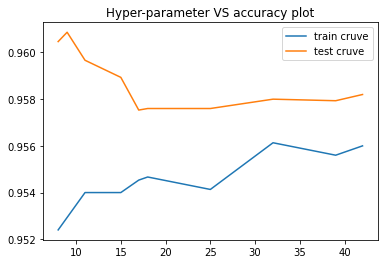

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#generating samples
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

neigh = KNeighborsClassifier()
param_range = (1,50)
folds = 3
test_scores, train_scores, params = RandomSerachCV(X_train, y_train, neigh, param_range, folds)
print(train_scores)
print(test_scores)

#plot
plt.plot(params['n_neighbors'],train_scores, label='train cruve')
plt.plot(params['n_neighbors'],test_scores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

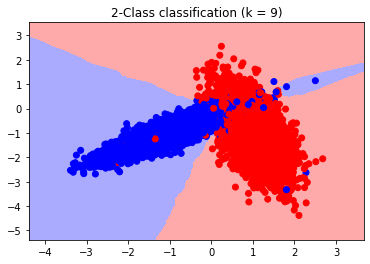

In [3]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()
    
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 9)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)